In [115]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.preprocessing import scale, StandardScaler, MinMaxScaler
from sklearn.linear_model import LinearRegression, LogisticRegression, Ridge, Lasso
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error, \
                            accuracy_score, precision_score, recall_score, classification_report

In [6]:
# 1. load dataset
# 2. show first 10 of dataset
# 3. show stats summaries
# 4. show dataset shape
# 5. show dataset info

exams = pd.read_csv("exams.csv")
display(exams.head(10))
display(exams.describe())
display(exams.shape)
display(exams.info())

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,some high school,standard,completed,56,65,64
1,male,group B,some high school,standard,none,65,54,54
2,female,group B,associate's degree,standard,completed,81,85,82
3,female,group C,some high school,free/reduced,completed,48,70,70
4,male,group D,some high school,standard,none,78,66,69
5,male,group E,some high school,standard,completed,79,71,71
6,male,group B,associate's degree,standard,none,70,65,61
7,female,group B,associate's degree,standard,completed,61,78,81
8,female,group B,bachelor's degree,standard,none,69,80,77
9,male,group D,some college,free/reduced,none,43,50,53


,math score,reading score,writing score
count,100.000000,100.000000,100.000000
mean,65.750000,67.060000,66.190000
std,14.338177,14.699564,15.063968
min,30.000000,25.000000,22.000000
25%,56.000000,57.750000,54.000000
50%,66.500000,68.000000,67.500000
75%,76.250000,79.000000,78.000000
max,96.000000,95.000000,99.000000


(100, 8)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 8 columns):
gender                         100 non-null object
race/ethnicity                 100 non-null object
parental level of education    100 non-null object
lunch                          100 non-null object
test preparation course        100 non-null object
math score                     100 non-null int64
reading score                  100 non-null int64
writing score                  100 non-null int64
dtypes: int64(3), object(5)
memory usage: 6.4+ KB


None

In [9]:
exams["mean_score"] = exams[["math score", "writing score", "reading score"]].mean(axis=1)

In [10]:
exams.head(7)

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score,mean_score
0,female,group B,some high school,standard,completed,56,65,64,61.666667
1,male,group B,some high school,standard,none,65,54,54,57.666667
2,female,group B,associate's degree,standard,completed,81,85,82,82.666667
3,female,group C,some high school,free/reduced,completed,48,70,70,62.666667
4,male,group D,some high school,standard,none,78,66,69,71.000000
5,male,group E,some high school,standard,completed,79,71,71,73.666667
6,male,group B,associate's degree,standard,none,70,65,61,65.333333


In [22]:
categorical_cols = [
    "gender", "race/ethnicity",
    "parental level of education", "lunch", "test preparation course"
]

In [18]:
# show info about categorical features
print("male:", exams["gender"].value_counts()["male"])
print("female:", exams["gender"].value_counts()["female"])

male: 59
female: 41


In [30]:
# compute mean and median for each values in categorical columns
for col in categorical_cols:
    display(
        exams.groupby(by=col)["math score", "reading score", "writing score"].mean()
    )

,math score,reading score,writing score
gender,,,
female,65.487805,72.341463,73.682927
male,65.932203,63.389831,60.983051


,math score,reading score,writing score
race/ethnicity,,,
group A,67.500000,65.800000,65.700000
group B,60.920000,63.240000,60.880000
group C,65.892857,69.607143,68.357143
group D,65.708333,67.666667,68.416667
group E,73.461538,68.769231,68.000000


,math score,reading score,writing score
parental level of education,,,
associate's degree,68.250000,70.791667,71.750000
bachelor's degree,66.545455,72.000000,70.818182
high school,68.928571,67.214286,64.714286
master's degree,77.000000,80.000000,76.000000
some college,59.789474,61.000000,59.631579
some high school,64.142857,64.107143,63.392857


,math score,reading score,writing score
lunch,,,
free/reduced,58.423077,65.615385,64.730769
standard,68.324324,67.567568,66.702703


,math score,reading score,writing score
test preparation course,,,
completed,71.321429,74.071429,75.071429
none,63.583333,64.333333,62.736111


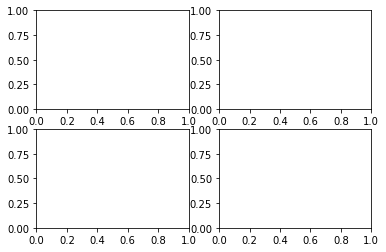

In [48]:
fig, ax = plt.subplots(2, 2)
ax.flat

In [50]:
for i, j in zip(["a", "b", "c"], [1, 2, 3]):
    print(i, j)

a 1
b 2
c 3


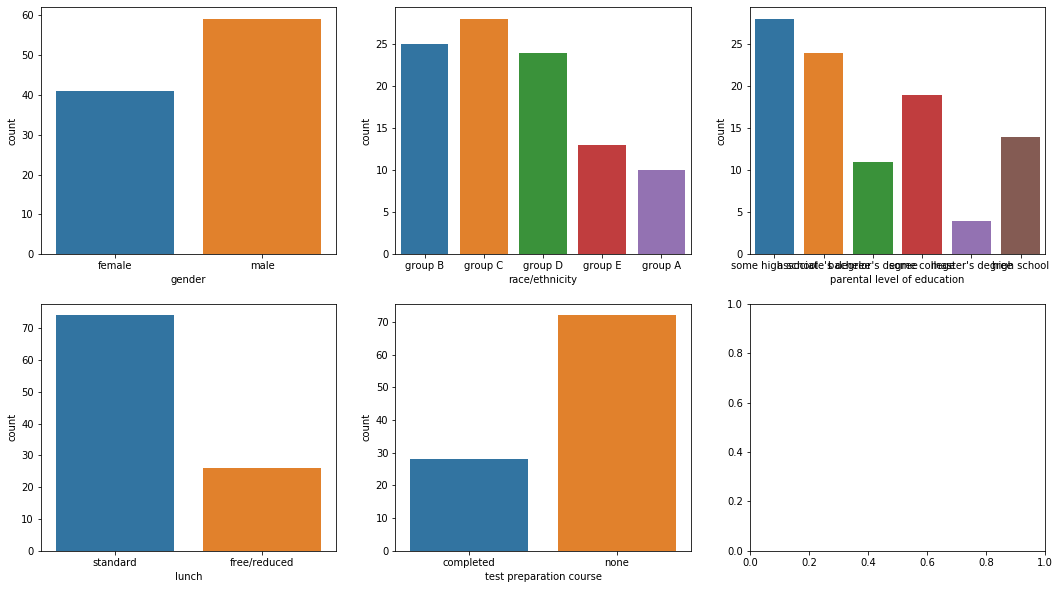

In [49]:
fig, ax = plt.subplots(2, 3, figsize=(18, 10))
for col, ax in zip(["gender", "race/ethnicity", "parental level of education", "lunch", "test preparation course"], ax.flat):
    sns.countplot(x=col, data=exams, ax=ax)

In [55]:
exams["math score"] = scale(exams[["math score"]])

In [58]:
exams["math score"].std()

1.005037815259212

In [61]:
# create matrix 5x5 with values normally distributed
norm_dist = np.random.randn(5, 5)
norm_dist

array([[ 1.33177871e+00,  5.60942337e-01,  3.33242697e-01,
        -8.28022585e-01, -2.72355527e-05],
       [ 1.42135291e+00,  1.71220595e+00, -6.25786758e-01,
         6.54485641e-01,  8.14423698e-01],
       [ 6.70351126e-01, -1.13733013e+00, -7.93520238e-01,
         1.14701440e+00,  1.32893392e+00],
       [-9.92293305e-01,  1.83558877e+00,  2.78631762e-01,
         1.05567710e+00,  7.54774275e-01],
       [ 2.14375240e+00,  8.06238751e-01, -6.23452626e-03,
        -6.41121809e-01,  6.67622485e-01]])

In [62]:
# reshape: (1, 5, 5)
norm_dist.reshape((1, 5, 5)).shape
norm_dist[np.newaxis, :, :].shape

(5, 5)

## Linear Regression

In [116]:
salary = pd.read_csv("salary.tsv", delimiter="\t")
salary

,YearsExperience,Salary
0,1.1,39343.0
1,1.3,46205.0
2,1.5,37731.0
3,2.0,43525.0
4,2.2,39891.0
5,2.9,56642.0
6,3.0,60150.0
7,3.2,54445.0
8,3.2,64445.0
9,3.7,57189.0


In [117]:
salary.describe()

,YearsExperience,Salary
count,30.000000,30.000000
mean,5.313333,76003.000000
std,2.837888,27414.429785
min,1.100000,37731.000000
25%,3.200000,56720.750000
50%,4.700000,65237.000000
75%,7.700000,100544.750000
max,10.500000,122391.000000


In [118]:
X = salary[["YearsExperience"]].values
y = salary[["Salary"]].values

In [119]:
X.shape, y.shape

((30, 1), (30, 1))

In [120]:
linreg = LinearRegression()
linreg.fit(X, y)
pred = linreg.predict(X)

In [121]:
linreg.predict([X[0]])

array([[36187.15875227]])

In [122]:
print("MSE:", mean_squared_error(y, pred))
print("MAE:", mean_absolute_error(y, pred))
print("RMSE:", np.sqrt(mean_squared_error(y, pred)))
print("r2:", r2_score(y, pred))

MSE: 31270951.722280964
MAE: 4644.2012894435375
RMSE: 5592.043608760661
r2: 0.9569566641435086


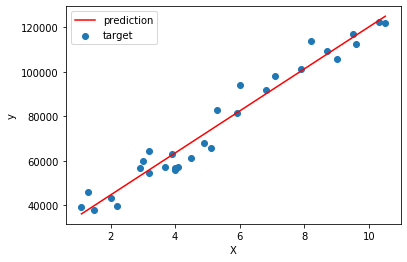

In [129]:
plt.scatter(X, y, label="target")
plt.plot(X, pred, 'r', label="prediction")
plt.xlabel("X")
plt.ylabel("y")
plt.legend()
plt.show()

## Logistic Regression

In [104]:
salary["SalaryGroup"] = salary["Salary"].apply(lambda x: 1 if x > 70000. else 0)
salary

,YearsExperience,Salary,SalaryGroup,PredSalaryGroup
0,1.1,39343.0,0,B
1,1.3,46205.0,0,B
2,1.5,37731.0,0,B
3,2.0,43525.0,0,B
4,2.2,39891.0,0,B
5,2.9,56642.0,0,B
6,3.0,60150.0,0,B
7,3.2,54445.0,0,B
8,3.2,64445.0,0,B
9,3.7,57189.0,0,B


In [105]:
X = salary[["YearsExperience"]].values
y = salary["SalaryGroup"].values

logreg = LogisticRegression()
logreg.fit(X, y)
pred = logreg.predict(X)

/Users/syahrulhamdani/.pyenv/versions/3.7.4/envs/h8/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


In [110]:
salary["PredSalaryGroup"] = pd.Series(pred)

In [109]:
print(precision_score(y, pred))
print(recall_score(y, pred))
print(accuracy_score(y, pred))

0.9285714285714286
1.0
0.9666666666666667


In [111]:
salary

,YearsExperience,Salary,SalaryGroup,PredSalaryGroup
0,1.1,39343.0,0,0
1,1.3,46205.0,0,0
2,1.5,37731.0,0,0
3,2.0,43525.0,0,0
4,2.2,39891.0,0,0
5,2.9,56642.0,0,0
6,3.0,60150.0,0,0
7,3.2,54445.0,0,0
8,3.2,64445.0,0,0
9,3.7,57189.0,0,0


In [114]:
print(classification_report(y, pred))

              precision    recall  f1-score   support

           0       1.00      0.94      0.97        17
           1       0.93      1.00      0.96        13

    accuracy                           0.97        30
   macro avg       0.96      0.97      0.97        30
weighted avg       0.97      0.97      0.97        30



## Regularization with Ridge & Lasso